### Getting the Dataset
Used: 
- https://nextjournal.com/gkoehler/digit-recognition-with-keras
- Dr.Prasad Perceptron file

In [3]:
# imports for array-handling and plotting


##############
import numpy as np
##############

##############
%matplotlib notebook
#calling it a second time may prevent some graphics errors
%matplotlib notebook
import matplotlib
# Matplotlib relis on some backend to actually reder the plots. DEfaulted backend is agg. Renders PNGs.
matplotlib.use('agg') 
import matplotlib.pyplot as plt
##############

# let's keep our keras backend tensorflow quiet
##############
import os
# Basically we want to control the log message output of our cells.
os.environ['TF_CPP_MIN_LOG_LEVEL']='3' 
#############

##############
# keras imports for the dataset and building our neural network
##############
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
##############

Now we will load the MNIST Dataset to our training ans test sets.

- X = Images
- Y = Labels

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #binary 1 to 0 ...

Check if we imported correctly

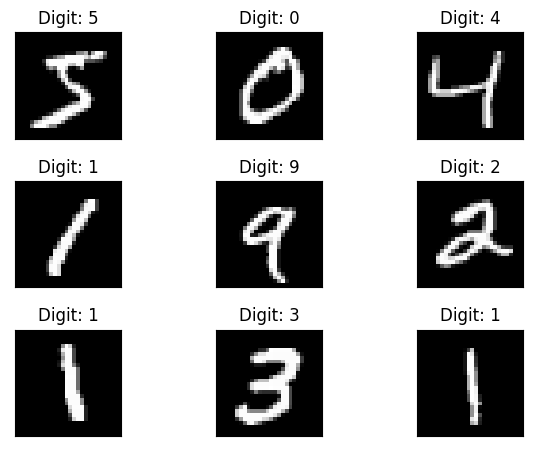

In [5]:
fig = plt.figure()
# Print all 9 images
for i in range(9):
    # To make it 3 x 3 
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    # display image
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    # display label
    plt.title("Digit: {}".format(y_train[i]))
    # spacing
    plt.xticks([])
    plt.yticks([])
fig

Make a vector, Reshape it to 784 = (28*28)

To have a visual understanding of how the pixels ( Colors/squares) works.

Lets look at the distribution of pixels.

As it can be seen:
- A lot of 0 pixels (The black part)
- Pixels 255 are basically the number (White part)

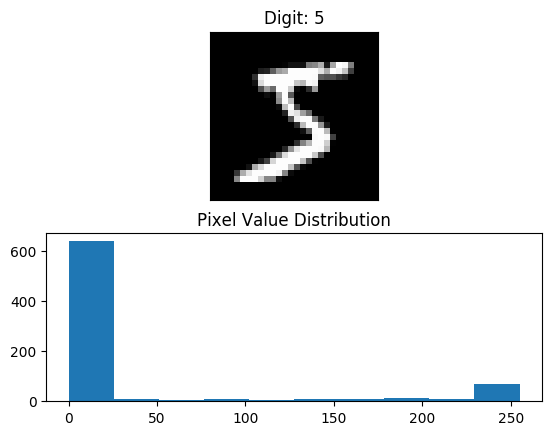

In [6]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

Know lets normalize the data to train our machine. Why?
- Reduce chance of getting stuck with local optima
- we are using SGD (Stochastic gradient descent) to find the optimal weight for the network

How?
- Reshape to a single vector 
- Normalize the pixel values to be 0 or 1

In [7]:
print("Shapes before Reshaping")
# let's print the shape before we reshape and normalize
print("X_train shape\n", X_train.shape)
print("y_train shape--", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

print("\nShapes after Reshaping")
# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Shapes before Reshaping
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)

Shapes after Reshaping
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [8]:
#################
# Extra
#################
# See how many labels are in our training set for each number.
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [9]:
# one-hot encoding using keras' numpy-related utilities
# classifies, more than 2 classes. 
# 
##################
# Basically, makes 0 if it is not the number, if number then 1 (Same as our where in Old MNIST)
#################

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


### Building the Perceptron

- Our Pixel vector ( when we reshape) is our input.

First Sequential Layer ( Hidden layers)
- Specify our input shape so that Keras can make correct matrices (784)
- We will reduce it to 512-node layers.
- Extra: There is Activation function to enhance the capabilities of the perceptron. (Relu Rectified Linear Unit)
- Extra: Dropout function, prevents overfitting
    - Randomly keep some network weights fixed when we would normally update them so that the network doesn't rely too much on very few nodes.
    
Second Sequential Layer
- Same as First Layer
- Didn't specify shape because it is implicit that is 784

Third Sequential Layer
- Reduce it to our 10 numbers ( 0 -> 9)
- Activation is softmax because is standard for multi-class targets

In [10]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(1, input_shape=(784,)))
model.add(Activation('linear'))                            


### Training Our Machine

After creating our model ( From above).We need to configure the learning process using .compile().

- Loss Function = categorical_crossentropy ( We could use different loss function but used this instead since tutorial uses it)
- Optimizer = adam (Algorithm used for first-order gradient based optimization of functions, based on adaptive estimate of lower-order moments.)
- Metrics = acc ( can be anything again) (Average training accuracy at the end of an epoch)
- val_acc = represents the accuracy of validation set at the end of an epoch.

In [11]:
# compiling the sequential model
from keras.optimizers import SGD

opt = SGD(lr=1)
model.compile(loss='mean_squared_error', metrics=['acc'], optimizer='sgd')

After building our model, train our machine!

- How many do we want to iterate on the whole training set ( epochs = 20)
- How many sample (test) we use for one update to the model's weights ( batch size)
    - The bigger the batch, more stable our SGD.
    - Careful of GPU memory limitation...
- Also, graph learning curve ( Is the AUC basically) 

In [12]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2)
#### Validation - , finding accuracy from your testing data.
#### NP.WHERE 
#,
          #validation_data=(X_test, Y_test))

# saving the model
save_dir = ""
model_name = 'Test.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

ValueError: Error when checking target: expected activation_1 to have shape (1,) but got array with shape (10,)

In [11]:
print(os.getcwd())

/home/lala/Desktop/UH-Manoa-Courses/EE 496 (Capstone Project - Machine Learning) [Python]


We can observe that our machine is learning well.

- Compare to last semester, we can observe that is not as accurate as before but is learning.

### Evaluate Model's Performance

Basically model.evalute computes the loss and metric defined when compiling the model.

In [12]:
mnist_model = load_model('linearRegression.h5')
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.04551475036740303
Test Accuracy 0.8373000025749207


Looks good ( accuracy )

Look at all examples


8373  classified correctly
1627  classified incorrectly


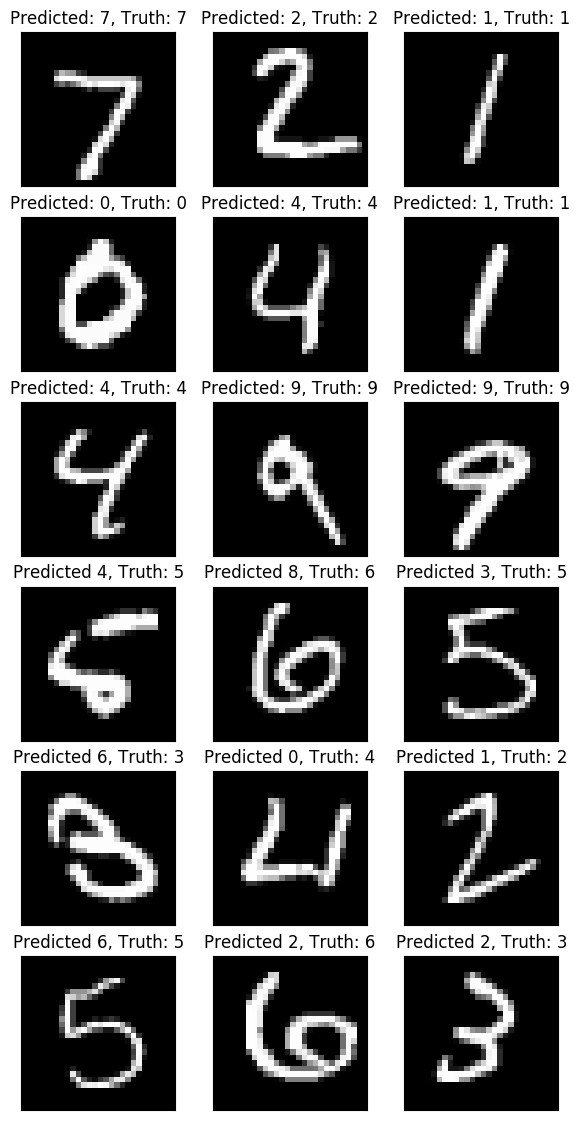

In [13]:
# load the model and create predictions on the test set
mnist_model = load_model('linearRegression.h5')
predicted_classes = mnist_model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

In [14]:
#See How far it is
# Accuracy from old database. 0.6939
# From this databaes 0.8367000222206116
print((0.6939/0.8367000222206116)*100)

82.93294867596408


In [2]:
###########
# GEt weigh
###########

# load the model and create predictions on the test set
mnist_model = load_model('linearRegression.h5')

#######################
## New Keras Weights
######################
print("-----------------Keras Weight --------------------")
Keras_Weight = mnist_model.get_weights()

print(type(Keras_Weight))
print(len(Keras_Weight))
print(len(Keras_Weight[0]))
print(len(Keras_Weight[0][0]))


print("-----------------Mnist Weight --------------------")
Keras_Weight = mnist_model.get_weights()

print(Keras_Weight)

-----------------Keras Weight --------------------
<class 'list'>
2
784
10
-----------------Mnist Weight --------------------
[array([[ 0.05946312,  0.03484167,  0.00554963, ..., -0.03148085,
         0.01978412,  0.05222728],
       [-0.03229902, -0.0641607 , -0.07173359, ...,  0.00453006,
         0.05490222, -0.00263315],
       [ 0.07795472, -0.08473554, -0.04091019, ..., -0.01907714,
        -0.04508588,  0.05748951],
       ...,
       [ 0.05651078,  0.05448883,  0.01251349, ..., -0.01623434,
        -0.0177151 , -0.05737017],
       [ 0.04844808,  0.02200559, -0.03036189, ...,  0.0641258 ,
        -0.04606216, -0.00985743],
       [ 0.05417522,  0.00429847,  0.08632375, ...,  0.06340613,
         0.01498862, -0.0338285 ]], dtype=float32), array([ 0.07653973,  0.16539767,  0.0277839 ,  0.01933105,  0.11245534,
        0.12665674,  0.06794593,  0.12381509, -0.08941411,  0.04021809],
      dtype=float32)]


In [16]:
mnist_old = np.load('outfile_name.npy') # loads your saved array into variable a.

In [17]:
print(mnist_old)

[ 1.25434816e+04  2.26401812e+09  1.02513971e+09  4.27413200e+09
  4.90488672e+09 -2.29867232e+09  5.65418014e+09  3.95912853e+09
  8.14459696e+08 -5.94877639e+08 -6.22218893e+09  2.63119442e+09
  1.13397917e+09 -5.17880249e+08  5.56513323e+08 -2.18717063e+09
 -2.55036234e+09  9.98601738e+08 -3.88272292e+09  2.45729586e+09
  3.82401769e+08  3.98651254e+08 -1.49687376e+09 -5.49242269e+08
  1.70346161e+09 -3.06060615e+09 -7.54461129e+08  6.55684722e+09
 -2.38545933e+09  1.47783296e+09 -1.96705662e+09 -3.47182074e+08
  2.60111056e-02 -7.21287017e-03  1.43267144e-03 -9.56150529e-04
  3.40677798e-06 -6.45341352e-05 -3.01261432e-04  5.43072820e-05
 -1.41102821e-04 -2.59961933e-04  2.94607133e-04 -2.66266987e-04
  6.13825396e-05 -3.35481018e-05 -3.55275348e-04 -5.48285607e-05
 -3.46178422e-05 -4.37398907e-04 -1.04968471e-03  1.03779997e-03
  8.46416471e+08 -1.46766450e+08 -7.76897949e+08 -4.84165201e+08
  2.89790115e+08  1.12952583e+07 -2.81519557e-02 -5.18718511e-03
  1.46962306e-03 -3.29593

In [28]:
print(len(Keras_Weight[0]))

print(len(mnist_old))

784
784


In [ ]:
output = mnist_old.dot(Keras_Weight[0])

In [ ]:
print(output)